# Effects of Trips Characteristics on Their Duration Times
## by Peter Potros Nassim

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of trips that could be used to affect their duration times. The main focus was on the five Cs of trips: start_timeofday, start_dayofweek, user_type, member_gender and member_birth_year.

## Dataset Overview

> The data consisted of duration_sec and attributes of approximately 180000 trips. The attributes included the five Cs of trips, as well as additional measurements such as start_station_id, start_station_latitude, start_station_longitude, end_station_id	end_station_latitude, end_station_longitude and bike_id. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike.csv')

# convert start and end time from object type to datetime type
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# extaract start time and day of each trip
df['start_timeofday'] = df['start_time'].dt.hour
df['start_dayofweek'] = df['start_time'].dt.day_name() 

# convert start_dayofweek and start_monthofyear into categorical types
ordinal_var_dict = {'start_dayofweek': df['start_dayofweek'].value_counts().index,
                    'start_timeofday': df['start_timeofday'].value_counts().index,}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)
    
# reoder days of week    
df['start_dayofweek'] = pd.Categorical(df['start_dayofweek'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)  

# drop rows where gender equal Other
df = df.drop(df.query(' member_gender=="Other"').index)    

## Distribution of Duration Times

> Duration Times in the dataset take on a very large range of values, from about 60 sec at the lowest, to about 85,000 sec at the highest. Plotted on a logarithmic scale, the distribution of duration times takes on a normal distribution.

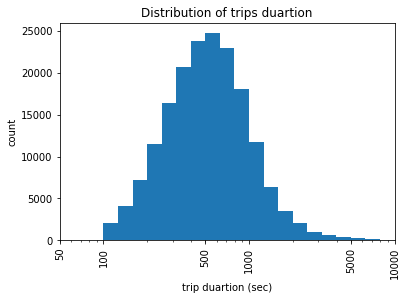

In [3]:
bins = 10 ** np.arange(2, 4, 0.1);
plt.hist(data=df, x='duration_sec', bins=bins);
plt.xscale('log');
xticks = [50, 100, 500, 1000, 5000, 10000]
plt.xticks(xticks, xticks)
plt.xlabel('trip duartion (sec)')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.title('Distribution of trips duartion')
plt.show()

## Distribution of users type and gender

> most of user are males and subscribers

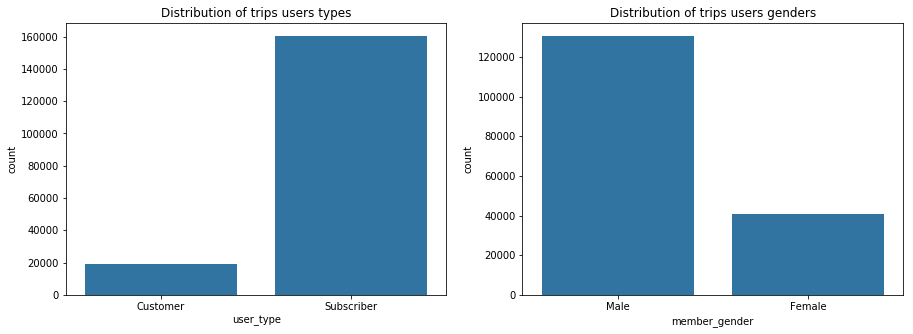

In [4]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.countplot(data=df, x='user_type', color=base_color);
plt.title('Distribution of trips users types')
plt.subplot(1,2,2)
sb.countplot(data=df, x='member_gender', color=base_color);
plt.title('Distribution of trips users genders')
plt.show()

## Distribution of start time of trips
 
   > at 7,8,9 am and 16,17,18 pm most of trips start on all the weekdays but not on sundays and stardays where the weekends.
on the other hand at the rest of day the number of trips start equally on all days of the week which aren't connected to work hours. 

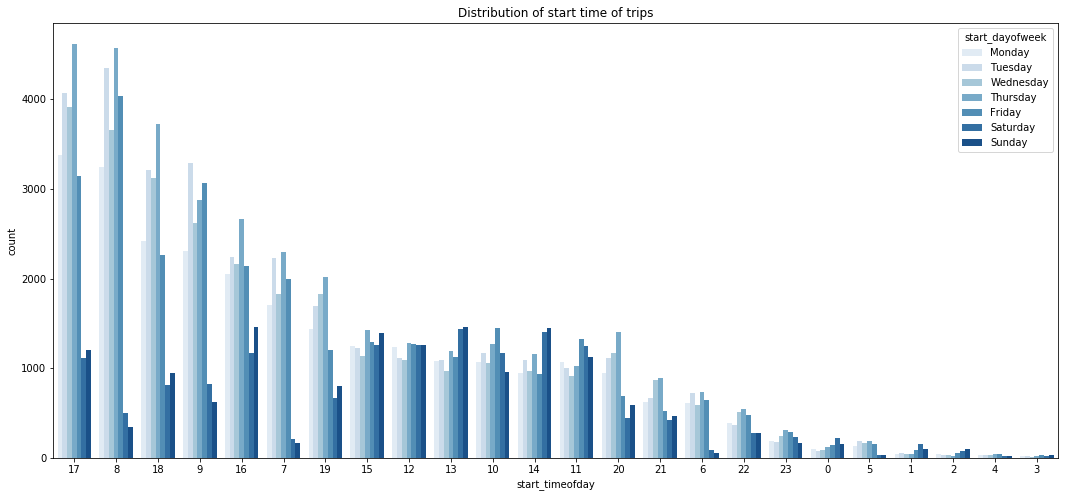

In [5]:
plt.figure(figsize = [18, 8]);
sb.countplot(data = df, x = 'start_timeofday', hue = 'start_dayofweek', palette = 'Blues');
plt.title('Distribution of start time of trips');

## Distaribution of users types on days of week

  > number of customers are the same for all days of week, i think these users which uses bikes for practicing and exercises not for work beacause the avg duration times of their trips are longer than for consumers. 

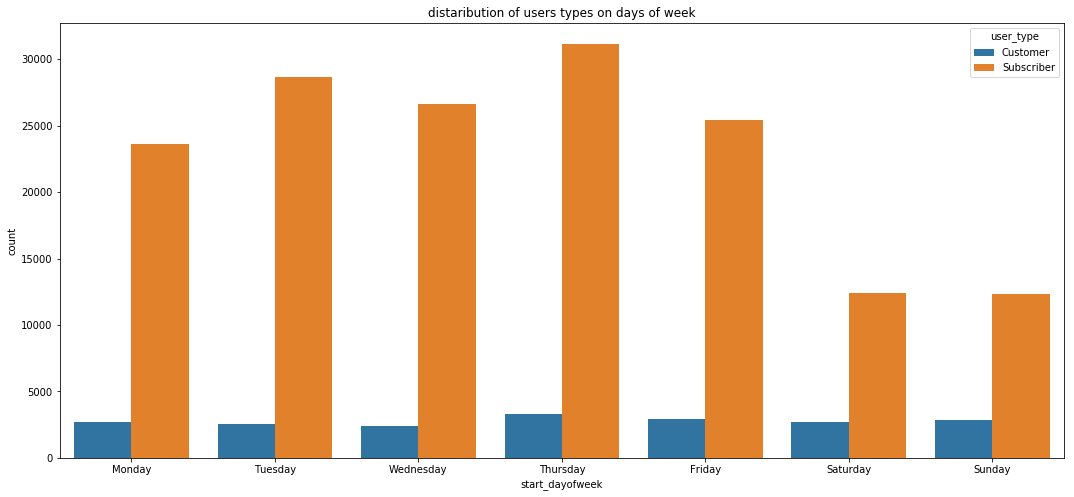

In [6]:
plt.figure(figsize = [18, 8])
sb.countplot(data = df, x = 'start_dayofweek', hue = 'user_type');
plt.title('distaribution of users types on days of week');

## Mean of trips duartion vs start_timeofday and start_dayofweek

  > the trips that start at all hours of sundays and saturdays take longer duration mean than the other days of week, which confirms that these trips for joureny and exercises not for work.

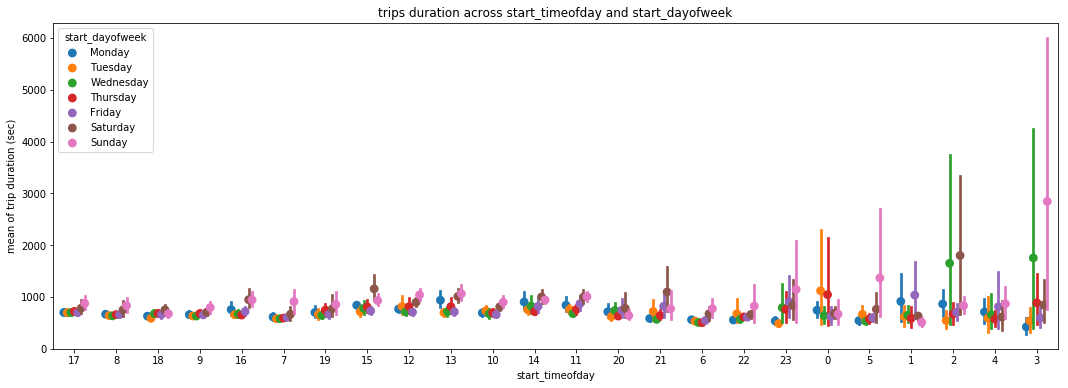

In [7]:
fig = plt.figure(figsize = [18,6])
ax = sb.pointplot(data = df, x = 'start_timeofday', y = 'duration_sec', hue = 'start_dayofweek',
            linestyles = '', dodge = 0.5)
plt.title('trips duration across start_timeofday and start_dayofweek')
plt.ylabel('mean of trip duration (sec)')
plt.show();